# 4$^{th}$ Order Runge-Kutta Method

In [35]:
import numpy as np

def rk4_step(y0, x0, f, h, f_args = {}):
    ''' Simple python implementation for one RK4 step. 
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yp1 - M x 1 numpy array of variables at time step x0 + h
            xp1 - time step x0+h
    '''
    k1 = h * f(y0, x0, **f_args)
    k2 = h * f(y0 + k1/2., x0 + h/2., **f_args)
    k3 = h * f(y0 + k2/2., x0 + h/2., **f_args)
    k4 = h * f(y0 + k3, x0 + h, **f_args)
    
    xp1 = x0 + h
    yp1 = y0 + 1./6.*(k1 + 2.*k2 + 2.*k3 + k4)
    
    return(yp1,xp1)

def rk4(y0, x0, f, h, n, f_args = {}):
    ''' Simple implementation of RK4
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            n      - number of steps
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yn - N+1 x M numpy array with the results of the integration for every time step (includes y0)
            xn - N+1 x 1 numpy array with the time step value (includes start x0)
    '''
    if type(y0) == float:
        N = 1
    else:
        N = y0.shape[0]
    yn = np.zeros((n+1, N))
    xn = np.zeros(n+1)
    yn[0,:] = y0
    xn[0] = x0
    
    for n in np.arange(1,n+1,1):
        yn[n,:], xn[n] = rk4_step(y0 = yn[n-1,:], x0 = xn[n-1], f = f, h = h, f_args = f_args)
        
    return(yn, xn)

# Be advised that the integration can take a while for large values of n (e.g >=10^5).

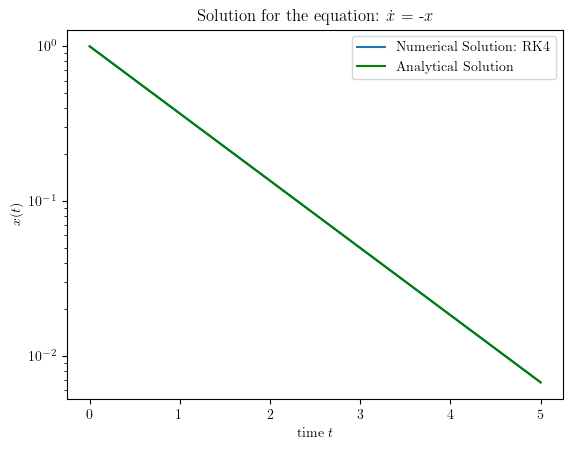

In [36]:
#nummerical solution for the ODE: $\dot{x} = -x$
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.use("pgf")
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
def f_0(y,x,**f_args):
    return -y

%matplotlib inline    
yn,xn = rk4(1.,0.,f_0,0.01,int(5/0.01))
plt.plot(xn,yn, label = 'Numerical Solution: RK4')

#analytical solution to the problem
def f_01(x):
    return np.exp(-x)
t = np.linspace(0,5,int(5/0.01))
plt.plot(t,f_01(t), color = "green", label = 'Analytical Solution')
plt.yscale('log')
plt.title(r'Solution for the equation: $\dot{x}$ = -$x$')
plt.ylabel(r'$x(t)$')
plt.xlabel(r'time $t$')
plt.legend()

In [37]:
def comparition(y0,x0,f,h,e,f_args = {}):
    n = int(e/h)
    
    #nummerical solution
    yn, xn = rk4(y0,x0,f,h,n,f_args={})
    fig1, ax1 = plt.subplots()
    ax1.plot(xn,yn, label = r'Numerical Solution: RK4 with $\Delta$ $t$ = {}'.format(h))
    
    #analytical solution
    def f_1(x):
        return np.exp(-x)
    t = np.linspace(0,e,n)
    ax1.plot(t,f_1(t), color = "green", label = 'Analytical Solution')
    plt.yscale('log')
    plt.title(r'Solution for the equation: $\dot{x}$ = -$x$')
    plt.legend()
    plt.ylabel(r'$x(t)$')
    plt.xlabel(r'time $t$')

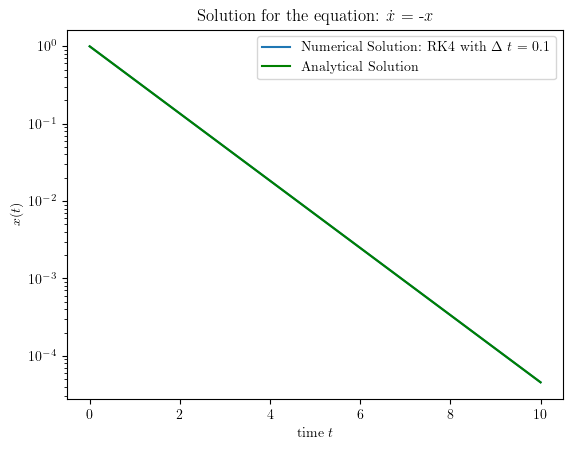

In [38]:
comparition(1.,0.,f_0,0.1,10)

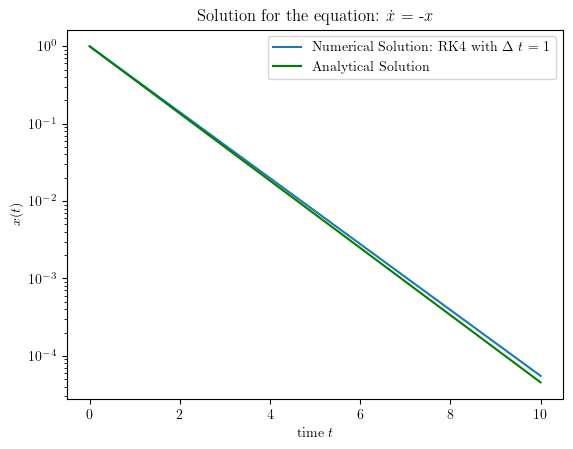

In [39]:
comparition(1.,0.,f_0,1,10)

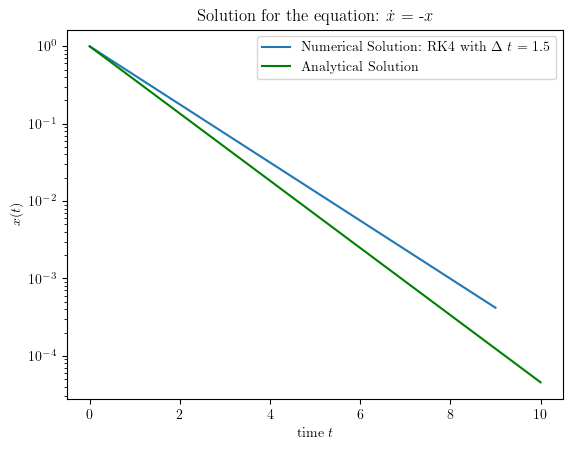

In [40]:
comparition(1.,0.,f_0,1.5,10)

# Three-Body Problem

In [41]:
#defining the derivations for the three bodies
def f_1(y,x,m):
    return -m[1]*(y[0]-y[1])/np.linalg.norm(y[0]-y[1])**3 - m[2]*(y[0]-y[2])/np.linalg.norm(y[0]-y[2])**3

def f_2(y,x,m):
    return -m[0]*(y[1]-y[0])/np.linalg.norm(y[1]-y[0])**3 - m[2]*(y[1]-y[2])/np.linalg.norm(y[1]-y[2])**3

def f_3(y,x,m):
    return -m[1]*(y[2]-y[1])/np.linalg.norm(y[2]-y[1])**3 - m[0]*(y[2]-y[0])/np.linalg.norm(y[2]-y[0])**3

def x_dot(v,x,m):
    return v
# defining a new rk4-step for the 2. Order ODE
def rk4_step_three_body(y0, x0, v0,f, h, m):
    ''' Simple python implementation for one RK4 step. 
        Inputs:
            y0    - 3 x 2 numpy array specifying initial position of the 3 bodies of the ODE at the current time step
            v0    - 3 x 2 numpy array specifying initial velocity of the 3 bodeis
            x0    - current time step
            f      -3 x 1 numpy array containint the functions that calculates the derivates of all variables of the ODE
            h      - time step size
            m      - 3 x 1 numpy array that contains the masses of the 3 bodiesnction f
        Output:
            yp1 - M x 1 numpy array of variables at time step x0 + h
            xp1 - time step x0+h
    '''
    
    k1v = np.array([h * f[i](y0,x0,m) for i in range(0,3)])
    k1x = h*f[3](v0, x0, m)
    
    k2x = h * f[3](v0 + k1v/2.0, x0 + h/2.0, m)
    k2v = np.array([h * f[i](y0 + k1x/2.0, x0 + h/2.0, m) for i in range(0,3)])
    
    k3x = h * f[3](v0 + k2v/2., x0 + h/2., m)
    k3v = np.array([h * f[i](y0 + k2x/2., x0 + h/2., m) for i in range(0,3)])

    k4x = h * f[3](v0 + k3v, x0 + h, m)
    k4v = np.array([h * f[i](y0 + k3x, x0 + h, m) for i in range(0,3)])

    xp1 = x0 + h
    yp1 = y0 + 1./6.*(k1x + 2.*k2x + 2.*k3x + k4x)
    vp1 = v0 + 1./6.*(k1v + 2.*k2v + 2.*k3v + k4v)

    return vp1,yp1,xp1

In [42]:
def tbp_rk4(y0, v0, x0, f, h, e, m):
    n = int(e/h)
    
    ''' Simple implementation of RK4
        Inputs:
            y0    - 3 x 2 numpy array specifying initial position of the 3 bodies of the ODE at the current time step
            v0    - 3 x 2 numpy array specifying initial velocity of the 3 bodeis
            x0    - current time step
            f      -3 x 1 numpy array containint the functions that calculates the derivates of all variables of the ODE
            h      - time step size
            e      - upper limit for the time
            m      - 3 x 1 numpy array that contains the masses of the 3 bodies
        Outputs:
            yn - N+1 x 2 numpy array with the results of the integration for every time step (includes y0)
            xn - N+1 x 1 numpy array with the time step value (includes start x0)
    '''
    yn = np.zeros((n+1, 3, 2))
    vn = np.zeros((n+1, 3, 2))
    xn = np.zeros((n+1,1))
    vn[0,:] = v0
    yn[0,:] = y0
    xn[0,:] = x0
    
    
    for i in np.arange(1,n+1):
        
        vn[i,:], yn[i,:], xn[i] = rk4_step_three_body(y0 = yn[i-1,:], x0 = xn[i-1], v0 = vn[i-1,:], f = f, h = h, m= m)
    return vn,yn,xn

In [91]:
def tbp_orbit(y0, v0, x0, f, h, e, m):
    
    vn, yn, xn = tbp_rk4(y0, v0, x0, f, h, e, m)
    plt.plot(yn[:,0,0], yn[:,0,1], label = '1st body')
    plt.plot(yn[:,1,0], yn[:,1,1], label = '2nd body')
    plt.plot(yn[:,2,0], yn[:,2,1], label = '3rd body')
    plt.legend()
    plt.title(r'Orbit of three bodies')
    plt.ylabel(r'$x(t)$')
    plt.xlabel(r'$y(t)$')

## _a)_

In [92]:
y0 = np.array([np.array([0.97000436,-0.24308753]), np.array([0.0,0.0]), np.array([-0.97000436, 0.24308753])])
v0 = np.array([np.array([-0.46620368, -0.43236573]), np.array([0.93240737, 0.86473146]),np.array([-0.46620368,-0.43236573])])
f = np.array([f_1,f_2,f_3,x_dot])
m = np.array([1,1,1])

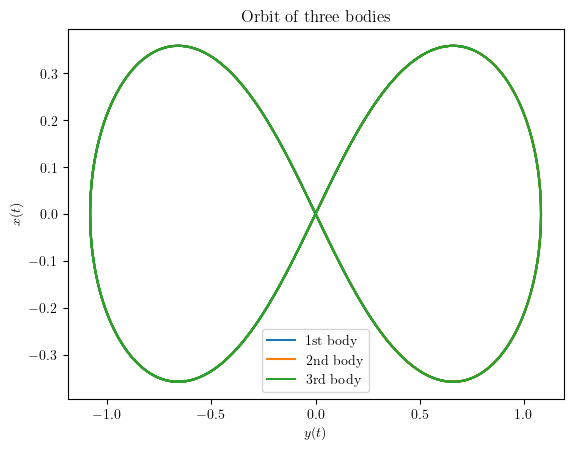

In [93]:
tbp_orbit(y0 = y0,v0 = v0, x0 = 0,f = np.array([f_1,f_2,f_3,x_dot]), h = 0.01, e = 15.5, m =m)

## _b)_

In [65]:
m1 = np.array([5,4,3])
v1 = np.array([[0.0], [0.0], [0.0]])
y1 = np.array([[np.sqrt(2), 0],[-np.sqrt(2)/2,3*np.sqrt(2)/2],[-np.sqrt(2), -2*np.sqrt(2)]])
v1 = np.array([[0.0,0.0], [0.0,0.0],[0.0,0.0]])

[[ 1.41421356  0.        ]
 [-0.70710678  2.12132034]
 [-1.41421356 -2.82842712]]
[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[ 1.41421334e+00  9.08435871e-08]
 [-7.07106593e-01  2.12132009e+00]
 [-1.41421344e+00 -2.82842694e+00]]
[[-0.00044685  0.00018169]
 [ 0.00037587 -0.00051163]
 [ 0.0002436   0.00037936]]


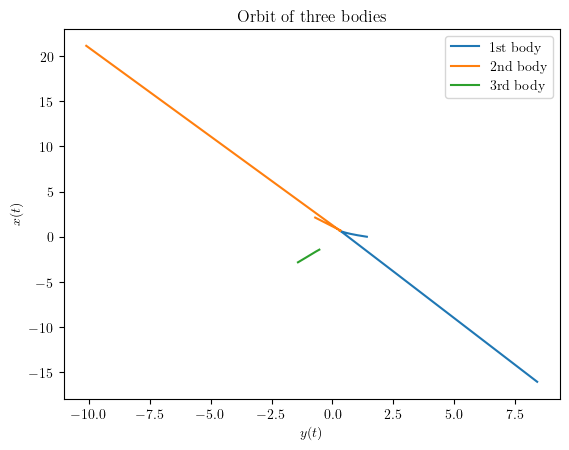

In [66]:
tbp_orbit(y0 = y1,v0 = v1, x0 = 0,f = np.array([f_1,f_2,f_3,x_dot]), h = 0.001, e= 2.5, m =m1)

In [89]:
def inv_tbp(y0, v0, x0, f, h, e, m):
    vn, yn, xn = tbp_rk4(y0, v0, x0, f, h, e, m)
    n = int(e/h)
    #plotting the orbit
    tbp_orbit(y0, v0, x0, f, h, e, m)
    #plotting the energy-error of the 3 bodies
    Ek1 = np.zeros((n+1,1))
    Ek2 = np.zeros((n+1,1))
    Ek3 = np.zeros((n+1,1))
    Ep1 = np.zeros((n+1,1))
    Ep2 = np.zeros((n+1,1))
    Ep3 = np.zeros((n+1,1))
    for i in range(0,len(vn)):
        Ek1[i] = m[0]*np.dot(vn[0][0],vn[0][0])/2 - m[0]*np.dot(vn[i][0],vn[i][0])/2
        Ek2[i] = m[1]*np.dot(vn[0][1], vn[0][1])/2 - m[0]*np.dot(vn[i][1],vn[i][1])/2
        Ek3[i] = m[2]*np.dot(vn[0][2], vn[0][2])/2 - m[0]*np.dot(vn[i][2],vn[i][2])/2
        Ep1[i] = m[0]*m[1]/np.linalg.norm(yn[0][0] - yn[0][1]) - m[0]*m[1]/np.linalg.norm(yn[i][0] - yn[i][1]) 
        Ep2[i] = m[1]*m[2]/np.linalg.norm(yn[0][1] - yn[0][2]) - m[1]*m[2]/np.linalg.norm(yn[i][1] - yn[i][2]) 
        Ep3[i] = m[0]*m[2]/np.linalg.norm(yn[0][0] - yn[0][2]) - m[0]*m[2]/np.linalg.norm(yn[i][0] - yn[i][2]) 

    E = Ek1 + Ek2 + Ek3 -Ep1 - Ep2-Ep3 #total energy of the system
    fig2, ax2 = plt.subplots()
    ax2.plot(xn,E)

    plt.title(r'Error of the total energy of the system as function of time')
    plt.xlabel(r'time $t$')
    plt.ylabel(r'errror of the energy $\Delta$ $E$ = $E(0)$ - $E{t}$')
    
    d12 = np.zeros((n+1,1))
    d23 = np.zeros((n+1,1))
    d13 = np.zeros((n+1,1))
    #plotting mutualdistance of the three bodies
    for i in range(0,len(yn)):
        d12[i] = np.linalg.norm(yn[i][0]-yn[i][1])
        d23[i] = np.linalg.norm(yn[i][1]-yn[i][2])
        d13[i] = np.linalg.norm(yn[i][0] - yn[i][2])
    
    fig3, ax3 = plt.subplots()
    ax3.plot(xn,d12, label = 'distance between body 1 and 2')
    ax3.plot(xn,d23, label = 'distance between body 2 and 3')
    ax3.plot(xn,d13, label = 'distance between body 1 and 3')
    plt.legend()
    plt.title(r'Mutual distance of the bodies as function of time')
    plt.xlabel(r'time $t$')
    plt.yscale('log')
    plt.ylabel(r'distance d($r_i$,$r_j$)')
    


[[ 0.97000436 -0.24308753]
 [ 0.          0.        ]
 [-0.97000436  0.24308753]]
[[-0.46620368 -0.43236573]
 [ 0.93240737  0.86473146]
 [-0.46620368 -0.43236573]]
[[ 9.69537550e-01 -2.43519743e-01]
 [ 9.32407914e-04  8.64730774e-04]
 [-9.70469958e-01  2.42655013e-01]]
[[-0.467417   -0.43206084]
 [ 0.932409    0.8647294 ]
 [-0.46499199 -0.43266856]]


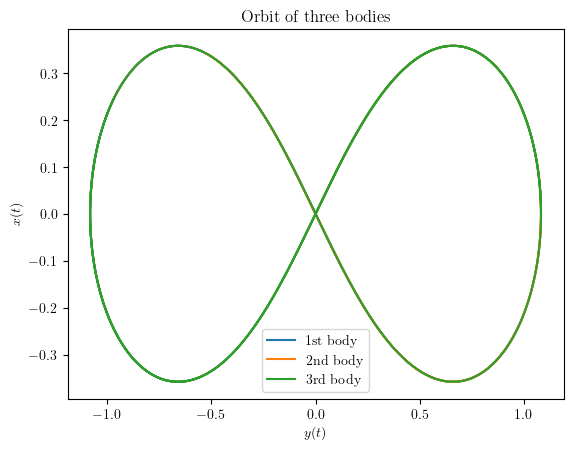

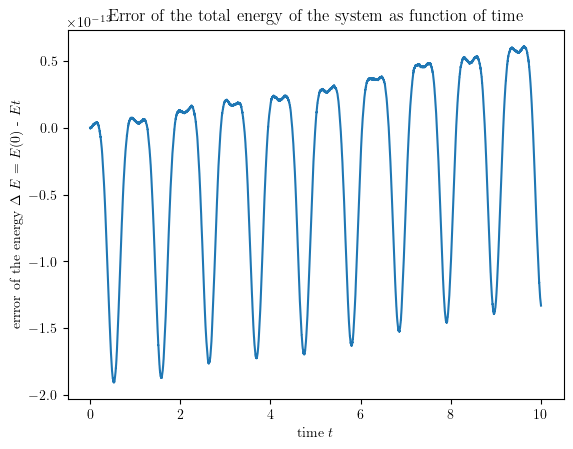

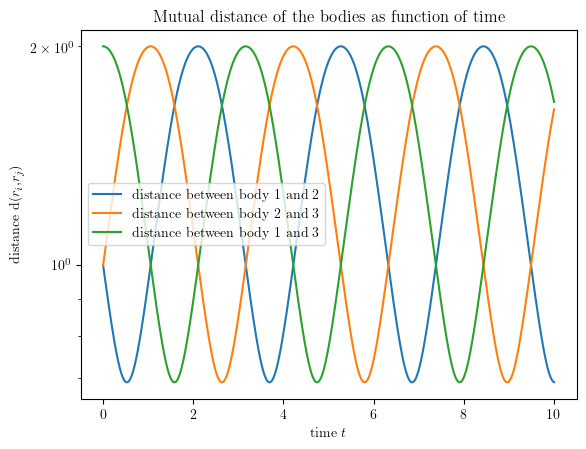

In [90]:
inv_tbp(y0 = y0,v0 = v0, x0 = 0,f = np.array([f_1,f_2,f_3,x_dot]), h = 0.001, e = 10, m =m)

[[ 1.41421356  0.        ]
 [-0.70710678  2.12132034]
 [-1.41421356 -2.82842712]]
[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[ 1.41421334e+00  9.08435871e-08]
 [-7.07106593e-01  2.12132009e+00]
 [-1.41421344e+00 -2.82842694e+00]]
[[-0.00044685  0.00018169]
 [ 0.00037587 -0.00051163]
 [ 0.0002436   0.00037936]]


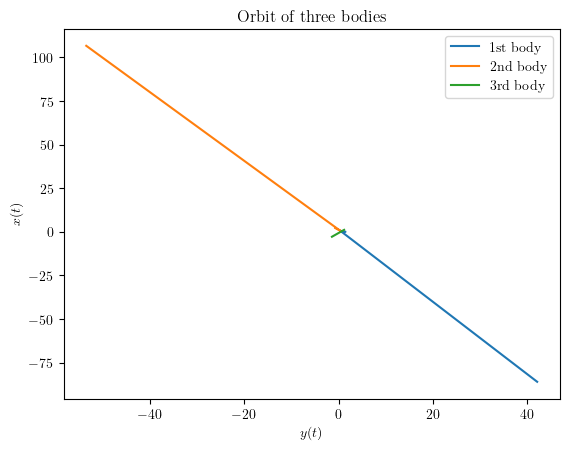

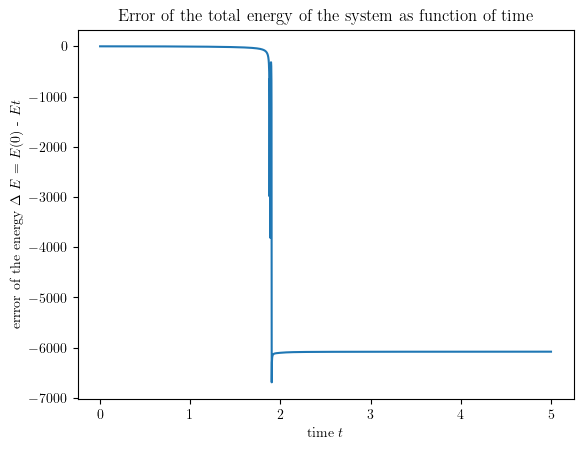

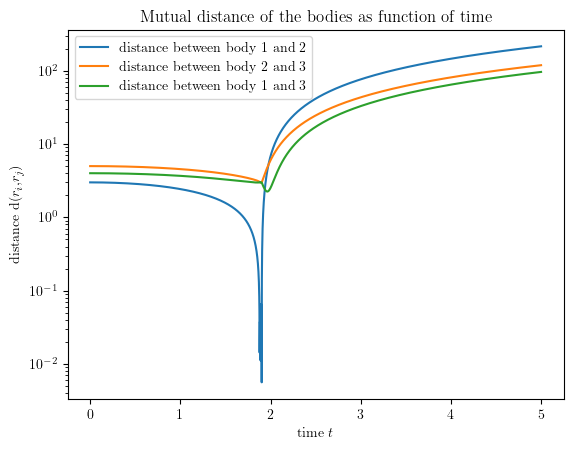

In [86]:
inv_tbp(y0 = y1,v0 = v1, x0 = 0,f = np.array([f_1,f_2,f_3,x_dot]), h = 0.001, e= 5, m =m1)

[[ 1.41421356  0.        ]
 [-0.70710678  2.12132034]
 [-1.41421356 -2.82842712]]
[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[ 1.17926087  0.09977985]
 [-0.50691781  1.84959738]
 [-1.28954437 -2.63242959]]
[[-0.49630316  0.22116297]
 [ 0.42888781 -0.58057519]
 [ 0.25532152  0.40549531]]


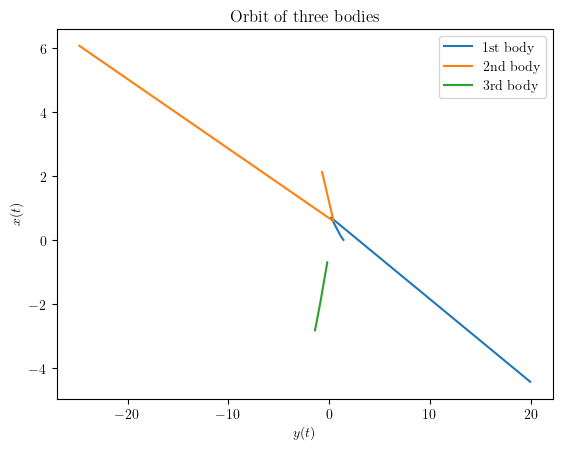

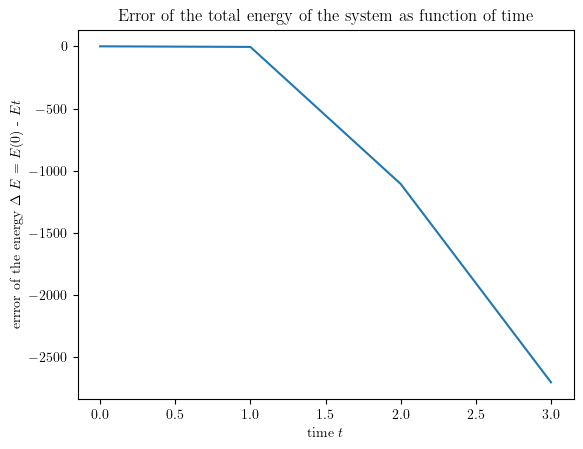

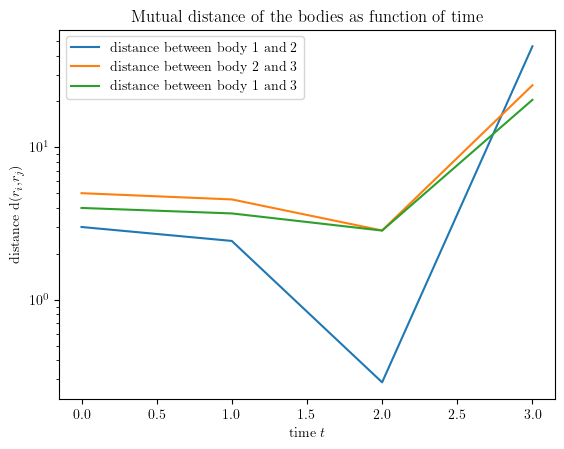

In [87]:
inv_tbp(y0 = y1,v0 = v1, x0 = 0,f = np.array([f_1,f_2,f_3,x_dot]), h = 1, e= 3, m =m1)

[[ 0.97000436 -0.24308753]
 [ 0.          0.        ]
 [-0.97000436  0.24308753]]
[[-0.46620368 -0.43236573]
 [ 0.93240737  0.86473146]
 [-0.46620368 -0.43236573]]
[[ 0.96511084 -0.24735206]
 [ 0.00942327  0.00862025]
 [-0.97441285  0.23870141]]
[[-0.51261295 -0.42039879]
 [ 0.95246693  0.85904168]
 [-0.41560098 -0.44472425]]


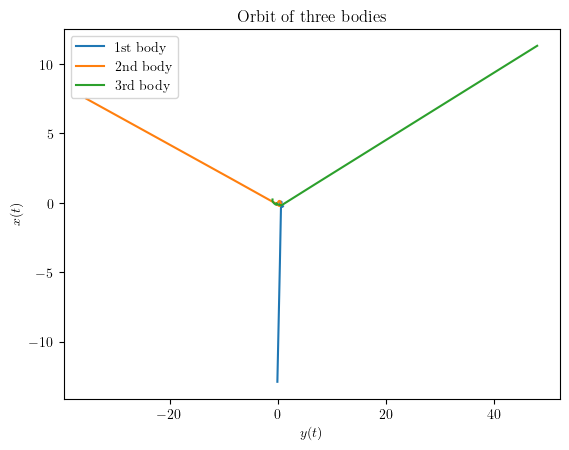

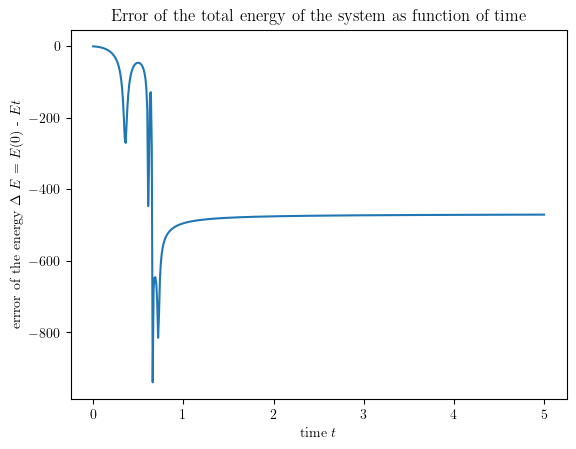

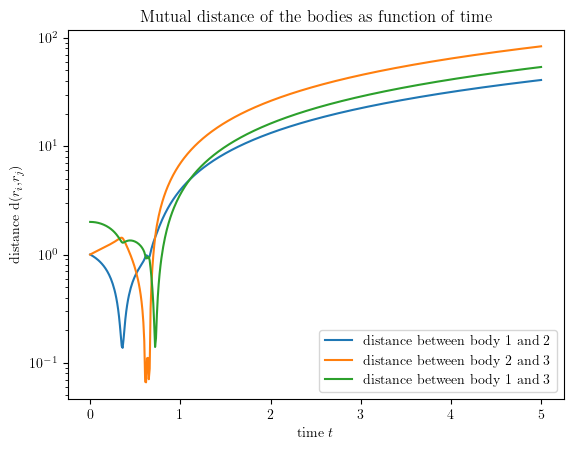

In [88]:
inv_tbp(y0 = y0,v0 = v0, x0 = 0,f = np.array([f_1,f_2,f_3,x_dot]), h = 0.01, e = 5, m =m1)